### Préambule : création d'un transformeur

In [1]:
import numpy as np
from numpy.random import rand
from sklearn.base import TransformerMixin

class Inverseur2x2(TransformerMixin):
    def __init__(self):         
        self.det = 0                    # L'attribut det est initialisé à 0 lors de l'instanciation
    
    def fit(self, X):
        if X.shape != (2, 2):           # L'attribut shape d'un array donne les dimensions de la matrice
            print("La matrice n'est pas de dimension 2x2")
            return
        self.det = X[0,0] * X[1,1] - X[0,1] * X[1,0]    # det = ad -bc
        
        return self
        
    
    def transform(self,X):
        if self.det == 0:               # Il faut que le déterminant soit non-nul pour que la matrice soit inversible.
            print("La matrice n'est pas inversible")
            return
        Y = np.zeros([2, 2])   # Création d'une nouvelle matrice 2x2
        Y[0, 0] = X[1, 1]                              
        Y[1, 1] = X[0, 0]
        Y[0, 1] = - X[0, 1]
        Y[1, 0] = - X[1, 0]
        return (1/self.det) * Y
        
inverseur = Inverseur2x2()

X = rand(2,2)
Y = inverseur.fit_transform(X)

print (X)
print (Y)

[[0.37687906 0.12165195]
 [0.54626701 0.92480221]]
[[ 3.27846228 -0.43126122]
 [-1.93653926  1.33605193]]


### Récupération du dataset

In [2]:
import kagglehub as kh
import pandas as pd

# Télécharger le dataset dans un dossier local
dataset_ref = "uciml/red-wine-quality-cortez-et-al-2009"
path = kh.dataset_download(dataset_ref)

# Localiser le fichier CSV dans le dossier téléchargé
csv_file = f"{path}/winequality-red.csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file)



d:\Sources\DS-Machine-Learning\AdvancedML\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
display(df)
df.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Gestion des doublons et valeurs manquantes

In [4]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())

# Supprimer les doublons
df = df.drop_duplicates()

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

print(df.shape)

240
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
(1359, 12)


### Vérification de la validité des données

In [5]:
# Vérifier l'ensemble des valeurs distinctes pour les données catégorielles
print(df['quality'].value_counts())

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64


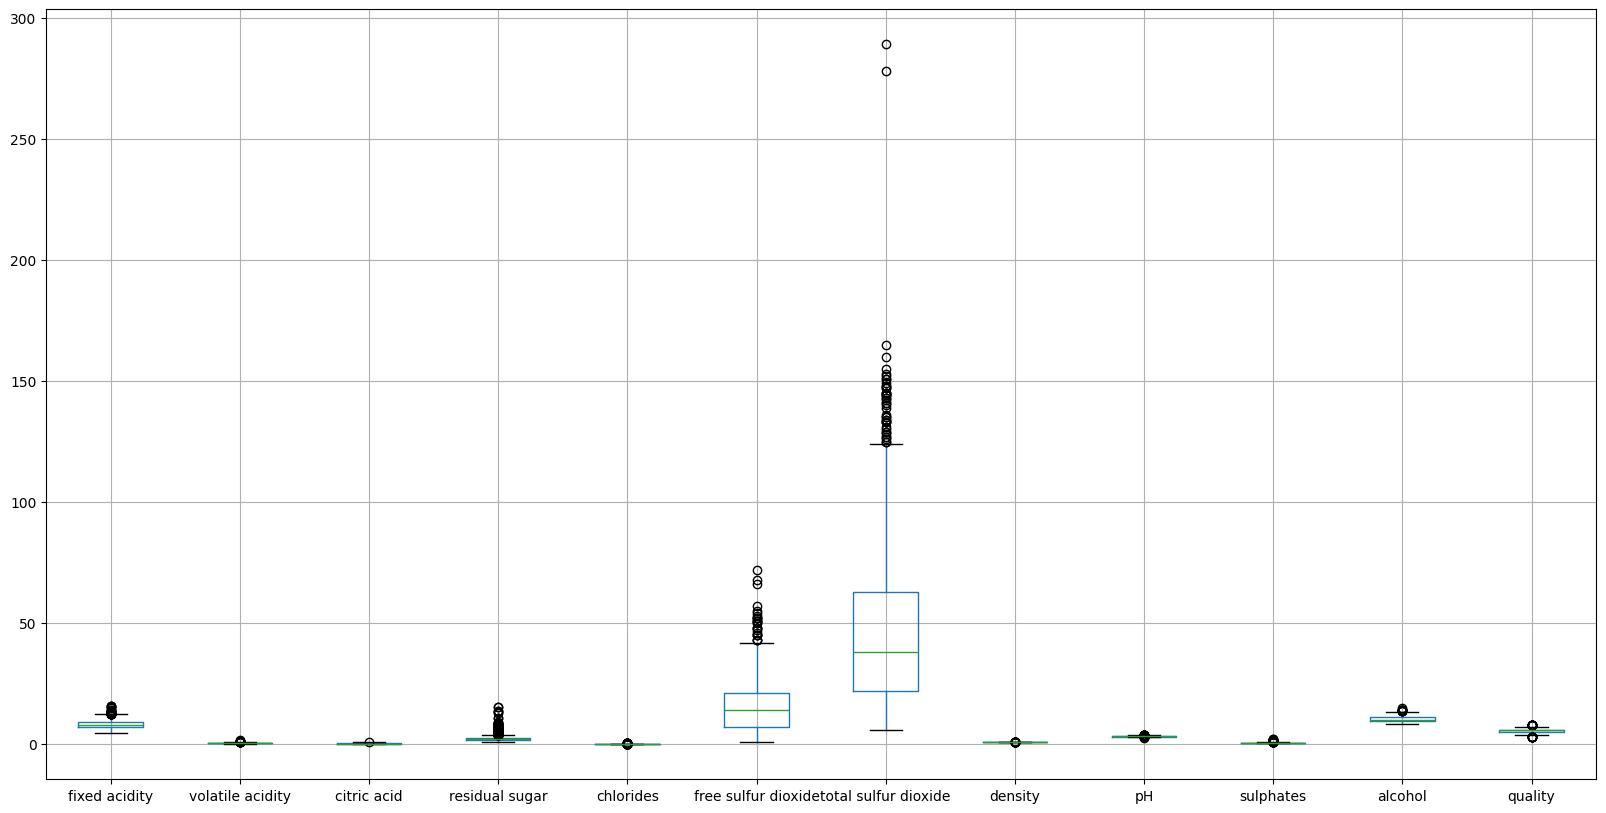

In [6]:
# Vérifier la distribution des données quantitatives avec des boxplots
import matplotlib.pyplot as plt
df.boxplot(column=df.columns.drop('quality').name, figsize=(20,10))
plt.show()
# Les données semblent cohérentes

### Exploration / analyse des relations entre les données

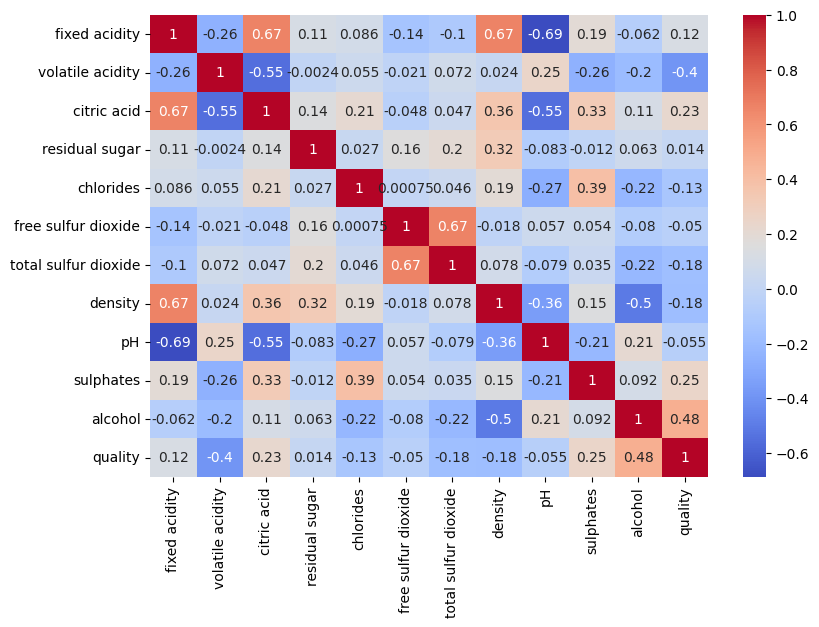

In [7]:
# Afficher avec Seaborn la heatmap des corrélations
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

# Les variables "alcohol" et "quality" semblent être les plus corrélées
# Les variables "volatile acidity" et "quality" semblent être les plus corrélées négativement

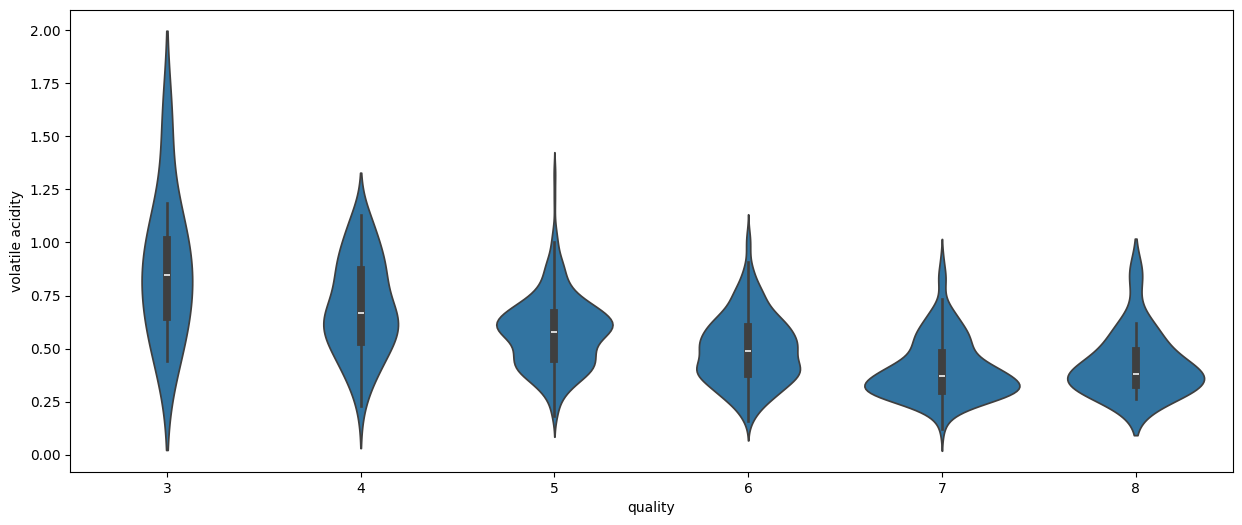

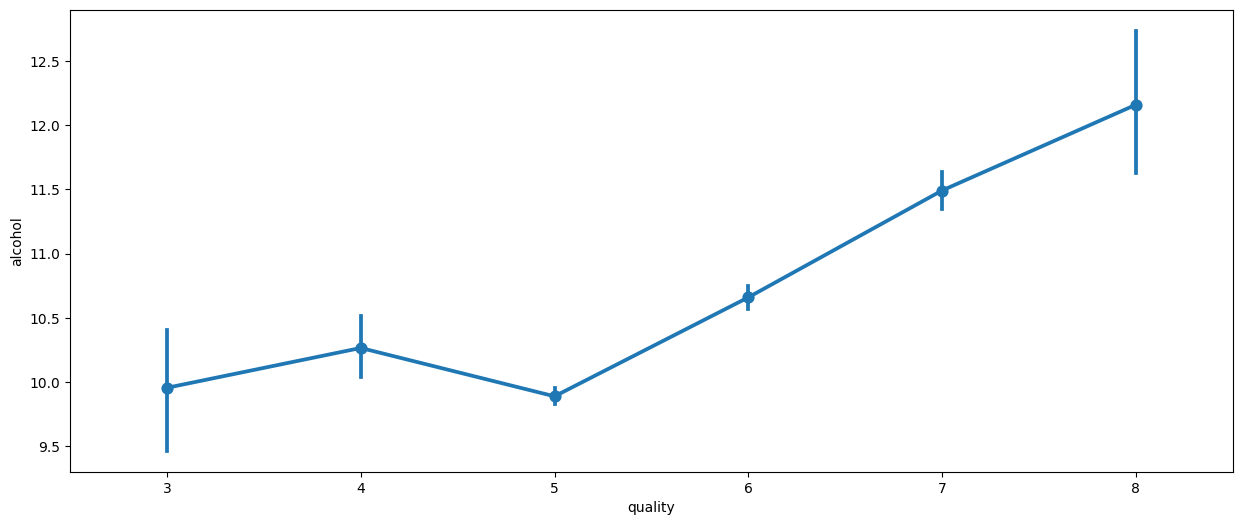

In [8]:
# Affichage d'un violinplot pour acidité volatile en fonction de la qualité
plt.figure(figsize=(15,6))
sns.violinplot(x='quality', y='volatile acidity', data=df)
plt.show()

# Affichage d'un point plot pour alcool en fonction de la qualité
plt.figure(figsize=(15,6))
sns.pointplot(x='quality', y='alcohol', data=df)
plt.show()

### Preprocessing

In [9]:
# On transforme la variable "quality" en variable catégorielle
df['quality'] = df['quality'].replace({3: 'mauvais', 4: 'mauvais', 5: 'mauvais', 6: 'bon', 7: 'bon', 8: 'bon'})
display(df)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,mauvais
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,mauvais
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,mauvais
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bon
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,mauvais
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,bon
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,mauvais
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bon
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,mauvais


In [10]:

# Séparation features / target
X = df.drop(columns='quality')
y = df['quality']

# Séparation training / testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Pipeline simple

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
logreg = LogisticRegression()

logreg_pipe = Pipeline(steps=[('normalisation',scaler),
                              ('model',logreg)])

logreg_pipe.fit(X_train,y_train)
print(logreg_pipe.score(X_test,y_test))

0.7647058823529411


### GridSearch avec pipeline

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
selector = SelectKBest()
svc = SVC()

svc_pipe = Pipeline(steps=[('normalisation',scaler),
                             ('selection',selector),
                             ('model',svc)])

params = {'selection__k': [5,10,'all'],
          'model__kernel': ['linear','poly','rbf']}

grid = GridSearchCV(svc_pipe,params,cv=5)
grid.fit(X_train,y_train)

print ("Best params : ",grid.best_params_)
print ("Best score : ",grid.best_score_)

Best params :  {'model__kernel': 'rbf', 'selection__k': 'all'}
Best score :  0.7534054876759819


In [13]:
y_pred = grid.predict(X_test)

# Afficher la matrice de confusion
display(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))

# Afficher le rapport de classification
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

Classe prédite,bon,mauvais
Classe réelle,,
bon,113,24
mauvais,37,98


              precision    recall  f1-score   support

         bon       0.75      0.82      0.79       137
     mauvais       0.80      0.73      0.76       135

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.78      0.78      0.78       272

